In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import numpy as np
import os, sys
from astropy.io import fits

## Begin loop to read into BIAS files  

In [2]:
cd


C:\Users\speco


In [3]:
files = os.listdir('astro136/DATA/BIAS')

print(files)

['Project1_SB.00000002.BIAS.fits', 'Project1_SB.00000003.BIAS.fits', 'Project1_SB.00000004.BIAS.fits', 'Project1_SB.00000005.BIAS.fits', 'Project1_SB.00000006.BIAS.fits', 'Project1_SB.00000007.BIAS.fits', 'Project1_SB.00000008.BIAS.fits', 'Project1_SB.00000009.BIAS.fits', 'Project1_SB.00000010.BIAS.fits', 'Project1_SB.00000011.BIAS.fits', 'Project1_SB.00000012.BIAS.fits', 'Project1_SB.00000013.BIAS.fits', 'Project1_SB.00000014.BIAS.fits', 'Project1_SB.00000015.BIAS.fits', 'Project1_SB.00000016.BIAS.fits', 'Project1_SB.00000017.BIAS.fits', 'Project1_SB.00000018.BIAS.fits', 'Project1_SB.00000019.BIAS.fits', 'Project1_SB.00000020.BIAS.fits', 'Project1_SB.00000021.BIAS.fits']


In [4]:
cd astro136/DATA/BIAS

C:\Users\speco\astro136\DATA\BIAS


In [5]:
biasdata = np.zeros((510, 765, len(files)))
for i in range(len(files)):
        hdul = fits.open(files[i])
        if not hdul[0].header['EXPTIME']:
            biasdata[:,:, i] = hdul[0].data
biasmastermean = np.mean(biasdata, axis = 2)
biasmastermedian = np.median(biasdata, axis = 2)
biasmasterstd = np.std(biasdata, axis = 2)

In [6]:
biasdata.shape
print(biasmasterstd)

[[5.60267793 6.12596931 5.61782876 ... 4.34137075 5.09803884 3.76696164]
 [7.44496474 4.98472667 7.36800516 ... 6.00749532 4.06786185 7.32444537]
 [5.9352759  6.63626401 5.58099454 ... 7.05265907 5.39073279 6.42261629]
 ...
 [6.71174344 7.88289287 5.35233594 ... 5.20960651 6.12596931 5.49795416]
 [5.80517011 5.16720427 4.97267534 ... 5.83502356 7.32444537 6.96616824]
 [4.42718872 4.10365691 4.75893896 ... 5.89491306 5.65574929 6.62268828]]


In [7]:
print(biasmastermean)

[[127.9  126.85 127.8  ... 106.95 107.1  106.1 ]
 [125.15 126.45 126.25 ... 103.9  103.45 105.45]
 [126.65 127.4  123.95 ... 104.4  107.2  103.5 ]
 ...
 [127.45 126.6  127.45 ... 106.4  104.35 105.65]
 [127.   128.   126.35 ... 108.45 105.55 109.65]
 [128.   127.4  124.45 ... 107.5  105.75 109.2 ]]


In [8]:
biasdata.shape

(510, 765, 20)

## Loop to read into Dark files

In [9]:
cd 

C:\Users\speco


In [10]:
filesDARK = os.listdir('astro136/DATA/DARK')

print(filesDARK)

['Project1_SB.00000027.DARK.fits', 'Project1_SB.00000028.DARK.fits', 'Project1_SB.00000029.DARK.fits', 'Project1_SB.00000030.DARK.fits', 'Project1_SB.00000031.DARK.fits', 'Project1_SB.00000032.DARK.fits', 'Project1_SB.00000033.DARK.fits', 'Project1_SB.00000034.DARK.fits', 'Project1_SB.00000035.DARK.fits', 'Project1_SB.00000036.DARK.fits', 'Project1_SB.00000037.DARK.fits', 'Project1_SB.00000038.DARK.fits', 'Project1_SB.00000039.DARK.fits', 'Project1_SB.00000040.DARK.fits', 'Project1_SB.00000041.DARK.fits', 'Project1_SB.00000042.DARK.fits', 'Project1_SB.00000043.DARK.fits', 'Project1_SB.00000044.DARK.fits', 'Project1_SB.00000045.DARK.fits', 'Project1_SB.00000046.DARK.fits', 'Project1_SB.00000047.DARK.fits', 'Project1_SB.00000048.DARK.fits', 'Project1_SB.00000049.DARK.fits', 'Project1_SB.00000050.DARK.fits', 'Project1_SB.00000051.DARK.fits', 'Project1_SB.00000052.DARK.fits', 'Project1_SB.00000053.DARK.fits', 'Project1_SB.00000054.DARK.fits', 'Project1_SB.00000055.DARK.fits', 'Project1_SB.

In [11]:
cd astro136/DATA/DARK

C:\Users\speco\astro136\DATA\DARK


In [12]:
darkdata = np.zeros((510, 765, len(filesDARK)))
exp_times =  []
for i in range(len(filesDARK)):
        hdul_dark = fits.open(filesDARK[i])
        exp_time = hdul_dark[0].header['EXPTIME']
        exp_times.append(exp_time) # adds the times to the list
        if not hdul_dark[0].header['EXPTIME']:
            darkdata[:,:, i] = hdul_dark[0].data
DARKmastermean = np.mean(darkdata, axis = 2)
DARKmastermedian = np.median(darkdata, axis = 2)
DARKmasterstd = np.std(darkdata, axis = 2)

In [13]:
exp_times = np.array(exp_times)
print(exp_times)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]


# master dark corrected

In [14]:
print(len(filesDARK))

40


In [15]:
biasmaster = biasmastermean[:,:,None]
z = np.arange(1,41,1) # creates evenly spaced values (start, stop, step)
for i in z:
    darkreduced = darkdata - biasmaster

In [16]:
DARKMASTER = np.absolute(darkreduced/exp_time)

In [30]:
DARKMASTER.shape

(510, 765, 40)

In [32]:
DARKMASTERmean = np.mean(DARKMASTER, axis = 2, keepdims = True)

## Master flat


In [24]:
cd

C:\Users\speco


In [25]:
filesFLATS = os.listdir('astro136/DATA/FLATS')

print(filesFLATS)

['Project1_SB.00000096.fits', 'Project1_SB.00000105.fits', 'Project1_SB.00000108.fits', 'Project1_SB.00000118.fits', 'Project1_SB.00000124.fits']


In [26]:
cd astro136/DATA/FLATS

C:\Users\speco\astro136\DATA\FLATS


In [28]:
FLATSdata = np.zeros((510, 765, len(filesFLATS))) # 5 of the twilight data files
exp_timesFLATS =  []
for i in range(len(filesFLATS)):
        hdul_FLATS = fits.open(filesFLATS[i])
        exp_timeFLATS = hdul_FLATS[0].header['EXPTIME']
        exp_timesFLATS.append(exp_timeFLATS) # adds the times to the list
        if not hdul_FLATS[0].header['EXPTIME']:
            FLATSdata[:,:, i] = hdul_FLATS[0].data
FLATSmastermean = np.mean(FLATSdata, axis = 2)
FLATSmastermedian = np.median(FLATSdata, axis =2)
FLATSmasterstd = np.std(FLATSdata, axis = 2)

In [29]:
biasmaster = biasmastermean[:,:,None]
z = np.arange(1,6,1) # creates evenly spaced values (start, stop, step)
for i in z:
    FLATSreduced = np.absolute(FLATSdata - biasmaster)

In [33]:
FLATSmaster = (FLATSreduced/exp_timesFLATS)- DARKMASTERmean

In [34]:
FLATSmaster.shape

(510, 765, 5)

In [99]:
FLATSmastermean = np.mean(FLATSmaster, axis = 2, keepdims = True)

# Science data


In [36]:
cd

C:\Users\speco


In [37]:
filesTWI_SKY = os.listdir('astro136/DATA/TWI_SKY')

print(filesTWI_SKY)

['Project1_SB.00000089.fits', 'Project1_SB.00000090.fits', 'Project1_SB.00000091.fits', 'Project1_SB.00000092.fits', 'Project1_SB.00000093.fits', 'Project1_SB.00000094.fits', 'Project1_SB.00000095.fits', 'Project1_SB.00000096.fits', 'Project1_SB.00000097.fits', 'Project1_SB.00000098.fits', 'Project1_SB.00000099.fits', 'Project1_SB.00000100.fits', 'Project1_SB.00000101.fits', 'Project1_SB.00000102.fits', 'Project1_SB.00000103.fits', 'Project1_SB.00000104.fits', 'Project1_SB.00000105.fits', 'Project1_SB.00000106.fits', 'Project1_SB.00000107.fits', 'Project1_SB.00000108.fits', 'Project1_SB.00000109.fits', 'Project1_SB.00000110.fits', 'Project1_SB.00000111.fits', 'Project1_SB.00000112.fits', 'Project1_SB.00000113.fits', 'Project1_SB.00000114.fits', 'Project1_SB.00000115.fits', 'Project1_SB.00000116.fits', 'Project1_SB.00000117.fits', 'Project1_SB.00000118.fits', 'Project1_SB.00000119.fits', 'Project1_SB.00000120.fits', 'Project1_SB.00000121.fits', 'Project1_SB.00000122.fits', 'Project1_SB.

In [38]:
cd astro136/DATA/TWI_SKY

C:\Users\speco\astro136\DATA\TWI_SKY


In [40]:
TWILIGHTdata = np.zeros((510, 765, len(filesTWI_SKY))) # all the twilight data
exp_time_science = []
times = []
for i in range(len(filesTWI_SKY)):
        hdul_twi = fits.open(filesTWI_SKY[i])
        exp_times_science = hdul_twi[0].header['EXPTIME']
        time = hdul_twi[0].header['TIME-OBS'].split(':')
        times.append(time)
        exp_time_science.append(exp_times_science)
        exp_science = np.array(exp_time_science)
        if not hdul_twi[0].header['EXPTIME']:
            TWILIGHTdata[:,:, i] = hdul_twi[0].data
TWILIGHTmastermean = np.mean(TWILIGHTdata, axis = 2)
TWILIGHTmastermedian = np.median(TWILIGHTdata, axis = 2)
TWILIGHTmasterstd = np.std(TWILIGHTdata, axis = 2)

In [101]:
SCIENCEMASTER = (((TWILIGHTdata - biasmaster)/exp_science)- DARKMASTERmean)/FLATSmastermean

In [104]:
ScienceMasterMean = np.mean(SCIENCEMASTER, axis = (0,1))

# Change the Time into seconds

In [47]:
times = np.array(times) # change the list into an array

In [49]:
times.shape

(67, 3)

In [80]:

hours = np.array(times[:,0])
minutes = np.array(times[:,1])
seconds = np.array(times[:,2])
print(len(seconds))

67


In [81]:
z = np.arange(0,67,1)
print(len(z))

67


In [82]:
hours_sec = []
for i in range(len(z)):
    hours_secs =  int(hours[i])
    hours_sec.append(hours_secs)
    
min_sec = []    
for i in range(len(z)):
    min_secs = int(minutes[i]) # converts specified value into integer
    min_sec.append(min_secs)


In [83]:
SECOND = []
for i in range(len(z)):
    second = float(seconds[i]) # converts number or string into a float
    SECOND.append(second)

    #hours_to_sec = hours_sec*360
    #min_sec= min_sec*60

In [92]:
hours_sec = np.array(hours_sec)
min_sec = np.array(min_sec)
print(hours_sec.shape)
print(min_sec.shape)

(67,)
(67,)


In [93]:
HOURS_SEC = hours_sec*3600
MIN_SEC = min_sec*60
print(len(SECOND))
print(MIN_SEC.shape)
print(HOURS_SEC.shape)

67
(67,)
(67,)


In [68]:
SEC = np.array(SECOND)
SEC.shape

(67,)

In [94]:
TIME = HOURS_SEC + MIN_SEC + SEC

In [95]:
TIME.shape
print(TIME)

[10513.195 10516.455 10519.716 10522.929 10526.143 10529.372 10532.617
 10535.799 10538.982 10542.18  10702.031 10706.212 10710.424 10714.667
 10718.879 10723.076 10727.272 10731.515 10735.727 10739.924 10873.533
 10878.993 10884.453 10889.991 10895.451 10900.911 10906.402 10911.894
 10917.354 10922.814 11088.759 11096.309 11103.844 11111.332 11118.773
 11126.261 11133.765 11141.222 11148.71  11156.276 11273.083 11285.578
 11298.043 11310.585 11323.065 11335.561 11348.088 11360.614 11373.141
 11385.59  11415.152 11437.694 11460.174 11482.685 11505.18  11527.722
 11550.17  11572.65  11595.286 11617.765 11677.97  11740.417 11802.942
 11865.42  11927.976 12039.579 12222.084]


In [67]:
TIME.shape

(67,)

C:\Users\speco\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


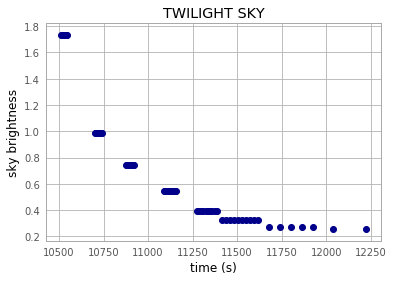

In [105]:
plt.xlabel('time (s)') 
plt.ylabel('sky brightness') 
plt.title('TWILIGHT SKY')
ax = plt.subplot(111)
plt.scatter(TIME, ScienceMasterMean, label="projected" , color = 'darkblue')
plt.show()